In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Classifier Algorithms Libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier




import missingno as msno # Missing data - Data Visualization
import collections as counter

import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\acer\Downloads\Tech_hr_data.csv")

### .T is the transpose method in pandas. It switches the rows and columns of a DataFrame, effectively transposing the DataFrame.

### So, df.head().T first displays the first few rows of the DataFrame df, and then transposes those rows and columns. 
### This can be useful for inspecting a small subset of data in a more convenient format, 
### particularly when the DataFrame has many columns and it's easier to view them as rows instead.


In [4]:
df.head().T

,0,1,2,3,4
Employee_ID,EMP0001,EMP0002,EMP0003,EMP0004,EMP0005
Age,60,50,36,64,29
Gender,Male,Male,Female,Male,Female
Department,Marketing,Marketing,Finance,Finance,Marketing
Position,Engineer,Specialist,Analyst,Manager,Manager
Tenure,24,28,18,3,22
Performance_Rating,2,2,4,4,3
Salary,80818,59932,36901,38597,93909
Recruitment_Source,Campus Recruitment,Campus Recruitment,Job Board,Campus Recruitment,Campus Recruitment
Satisfaction_Score,1.9,4.5,3.7,2.2,2.1


In [5]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover', 'Turnover_Description'],
      dtype='object')

In [6]:
df.head()

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description
0,EMP0001,60,Male,Marketing,Engineer,24,2,80818,Campus Recruitment,1.9,7,3,1,4,26,78,0,0,Retention
1,EMP0002,50,Male,Marketing,Specialist,28,2,59932,Campus Recruitment,4.5,4,4,0,2,26,30,3,0,Retention
2,EMP0003,36,Female,Finance,Analyst,18,4,36901,Job Board,3.7,0,1,0,5,18,86,3,0,Retention
3,EMP0004,64,Male,Finance,Manager,3,4,38597,Campus Recruitment,2.2,7,4,1,3,32,28,4,0,Retention
4,EMP0005,29,Female,Marketing,Manager,22,3,93909,Campus Recruitment,2.1,8,4,0,2,14,45,2,0,Retention


In [7]:
# Display columns with missing values
missing_values =df.isnull().sum()

missing_values[missing_values > 0].index

Index([], dtype='object')

In [8]:
df.shape

(1000, 19)

In [9]:
# Check for missing values
df.isnull().sum()

Employee_ID             0
Age                     0
Gender                  0
Department              0
Position                0
Tenure                  0
Performance_Rating      0
Salary                  0
Recruitment_Source      0
Satisfaction_Score      0
Last_Promotion_Years    0
Work_Life_Balance       0
Overworked              0
Job_Satisfaction        0
Distance_From_Work      0
Commute_Time            0
Number_Of_Promotions    0
Turnover                0
Turnover_Description    0
dtype: int64

In [10]:
df.describe()

,Age,Tenure,Performance_Rating,Salary,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,43.014000,14.443000,3.006000,74303.769000,3.485100,4.560000,2.94000,0.312000,3.049000,24.76600,51.92500,2.059000,0.19300
std,12.333772,8.567506,1.417029,26342.205416,0.979698,2.959249,1.45276,0.463542,1.424299,13.89872,21.64088,1.431631,0.39485
min,22.000000,0.000000,1.000000,30287.000000,0.500000,0.000000,1.00000,0.000000,1.000000,1.00000,15.00000,0.000000,0.00000
25%,32.000000,7.000000,2.000000,50912.500000,2.800000,2.000000,2.00000,0.000000,2.000000,13.00000,33.00000,1.000000,0.00000
50%,44.000000,14.000000,3.000000,74239.500000,3.500000,5.000000,3.00000,0.000000,3.000000,24.00000,52.00000,2.000000,0.00000
75%,54.000000,22.000000,4.000000,97722.500000,4.125000,7.000000,4.00000,1.000000,4.000000,37.00000,71.00000,3.000000,0.00000
max,64.000000,29.000000,5.000000,119959.000000,7.600000,9.000000,5.00000,1.000000,5.000000,49.00000,89.00000,4.000000,1.00000


In [67]:
df['Turnover'].value_counts()

Turnover
0    807
1    193
Name: count, dtype: int64

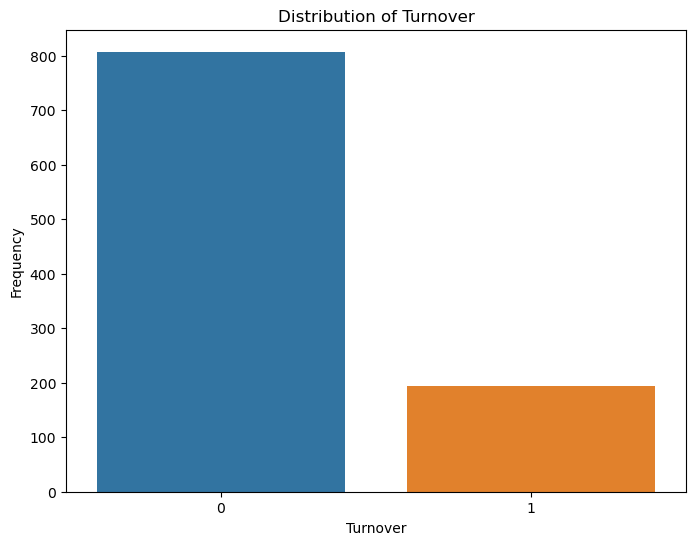

In [13]:
#Distribution of the target variable "Turnover"
plt.figure(figsize = (8,6))
sns.countplot(x= "Turnover", data =df)
plt.title('Distribution of Turnover')
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.show()

## This is done to know the number of Turnover in the company.

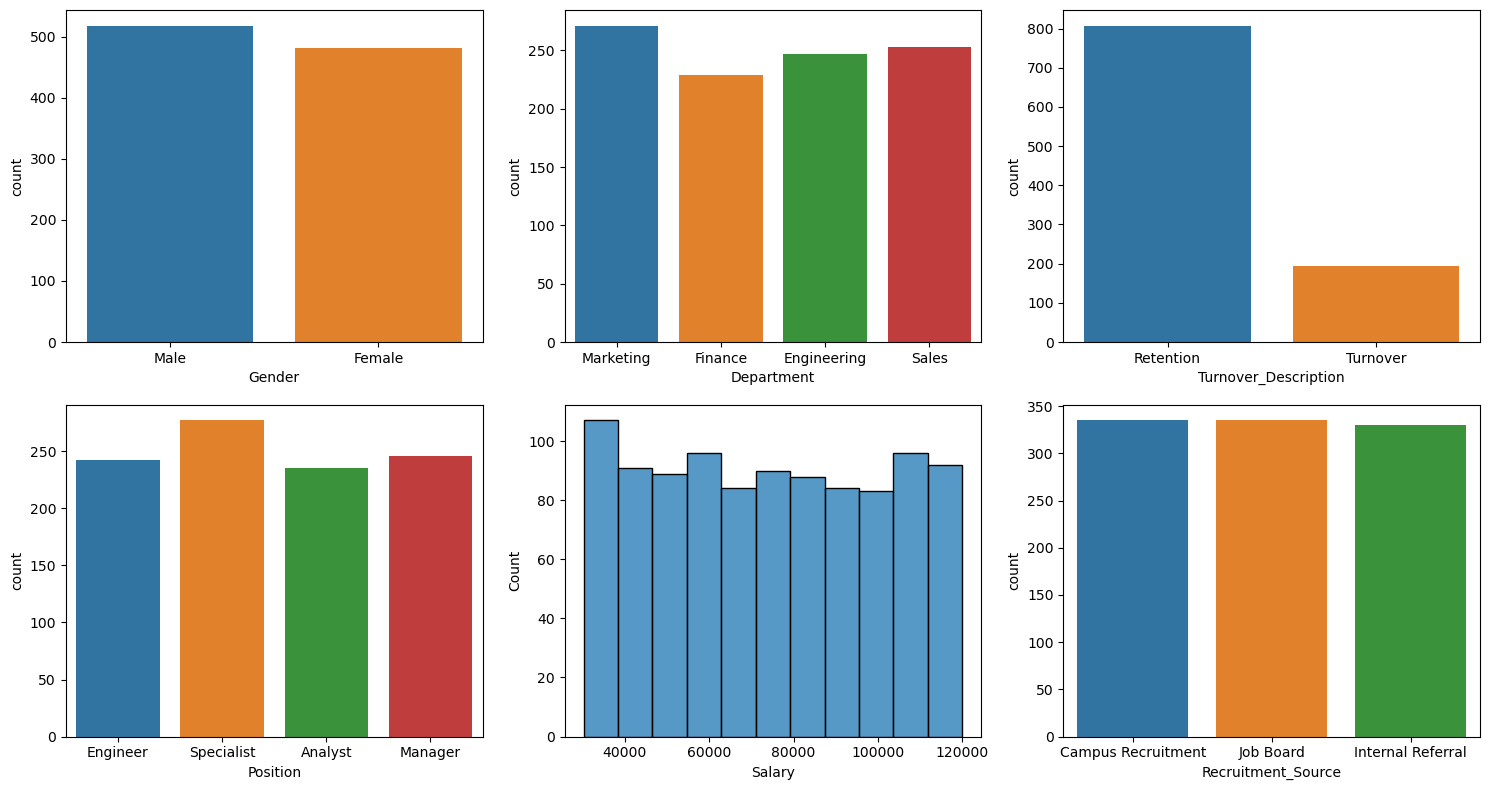

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
plt1 = sns.countplot(x='Gender', data=df, ax=axs[0, 0])
plt2 = sns.countplot(x='Department', data=df, ax=axs[0, 1])
plt3 = sns.countplot(x='Turnover_Description', data=df, ax=axs[0, 2])
plt4 = sns.countplot(x='Position', data=df, ax=axs[1, 0])
plt5 = sns.histplot(x='Salary', data=df, ax=axs[1, 1])
plt6 = sns.countplot(x='Recruitment_Source', data=df, ax=axs[1, 2])
plt.tight_layout()
plt.show()

#### Box one is to know the number of male and female in the company
#### Box two is to know the population of each department in the company
#### Box three is to know the population of employee that turnover from company and those that are retained.
#### Box four is used  to count the population of  specialist per position
#### Box five indicates count on population and the range of salary
#### Box six shows us the population of employed persons through recruitment source

In [15]:
pal = ['#35605B', '#E0742D', '#594352','#7ECAA4','#F78D39', '#DA4452' ]
sns.set_palette(pal)
colors= sns.color_palette()
colors

[(0.20784313725490197, 0.3764705882352941, 0.3568627450980392),
 (0.8784313725490196, 0.4549019607843137, 0.17647058823529413),
 (0.34901960784313724, 0.2627450980392157, 0.3215686274509804),
 (0.49411764705882355, 0.792156862745098, 0.6431372549019608),
 (0.9686274509803922, 0.5529411764705883, 0.2235294117647059),
 (0.8549019607843137, 0.26666666666666666, 0.3215686274509804)]

In [16]:
# Calculate IQR for each feature
Encode_columns = df[["Age","Tenure", "Performance_Rating", "Salary", "Satisfaction_Score", "Last_Promotion_Years", "Work_Life_Balance", "Overworked", "Job_Satisfaction", "Distance_From_Work", "Commute_Time", "Number_Of_Promotions", "Turnover"]]

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string features to integers using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains strings
     df[column] = label_encoder.fit_transform(df[column])

# Calculate IQR for each column
Encode_columns = df[["Age","Tenure", "Performance_Rating", "Salary", "Satisfaction_Score", "Last_Promotion_Years", "Work_Life_Balance", "Overworked", "Job_Satisfaction", "Distance_From_Work", "Commute_Time", "Number_Of_Promotions"]]

#### The Interquartile Range is a measure of statistical dispersion, which is used to describe the spread of a dataset. It is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the dataset.

#### The purpose of using the Interquartile Range in Python code or any statistical analysis is to identify the middle 50% of the dataset, excluding outliers. It provides a robust measure of spread that is less sensitive to extreme values or outliers compared to the range or standard deviation.

In [18]:
Encode_columns

,Age,Tenure,Performance_Rating,Salary,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions
0,60,24,2,80818,1.9,7,3,1,4,26,78,0
1,50,28,2,59932,4.5,4,4,0,2,26,30,3
2,36,18,4,36901,3.7,0,1,0,5,18,86,3
3,64,3,4,38597,2.2,7,4,1,3,32,28,4
4,29,22,3,93909,2.1,8,4,0,2,14,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,24,3,88502,4.7,7,2,0,1,38,87,1
996,25,17,4,78849,3.5,7,4,0,4,30,76,4
997,43,18,5,56347,4.9,5,1,0,4,41,62,1
998,23,22,3,79056,3.3,9,2,0,5,30,18,0


In [19]:
df.head()

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description
0,0,60,1,2,1,24,2,80818,0,1.9,7,3,1,4,26,78,0,0,0
1,1,50,1,2,3,28,2,59932,0,4.5,4,4,0,2,26,30,3,0,0
2,2,36,0,1,0,18,4,36901,2,3.7,0,1,0,5,18,86,3,0,0
3,3,64,1,1,2,3,4,38597,0,2.2,7,4,1,3,32,28,4,0,0
4,4,29,0,2,2,22,3,93909,0,2.1,8,4,0,2,14,45,2,0,0


In [20]:
Encode_columns = df[["Age","Tenure", "Performance_Rating", "Salary", "Satisfaction_Score", "Last_Promotion_Years", "Work_Life_Balance", "Overworked", "Job_Satisfaction", "Distance_From_Work", "Commute_Time", "Number_Of_Promotions"]]

In [21]:
lower_bound = Encode_columns.quantile(0.25)
lower_bound

Age                        32.0
Tenure                      7.0
Performance_Rating          2.0
Salary                  50912.5
Satisfaction_Score          2.8
Last_Promotion_Years        2.0
Work_Life_Balance           2.0
Overworked                  0.0
Job_Satisfaction            2.0
Distance_From_Work         13.0
Commute_Time               33.0
Number_Of_Promotions        1.0
Name: 0.25, dtype: float64

In [22]:
upper_bound = Encode_columns.quantile(0.75)
upper_bound

Age                        54.000
Tenure                     22.000
Performance_Rating          4.000
Salary                  97722.500
Satisfaction_Score          4.125
Last_Promotion_Years        7.000
Work_Life_Balance           4.000
Overworked                  1.000
Job_Satisfaction            4.000
Distance_From_Work         37.000
Commute_Time               71.000
Number_Of_Promotions        3.000
Name: 0.75, dtype: float64

# IQR = upper_bound - lower_bound
IQR

In [23]:
# Identification and removal of outliers
#outliers = (df[Encode_columns] < lower_bound) | (turnover_df[Encode_columns] > upper_bound)

outliers = upper_bound - lower_bound
outliers

outliers = ((Encode_columns< (lower_bound - 1.5 * outliers)) | (Encode_columns > (upper_bound + 1.5 * outliers))).any(axis=1).sum()
outliers
                                                                                         

13

In [24]:
[outliers]

[13]

In [25]:
[~outliers]

[-14]

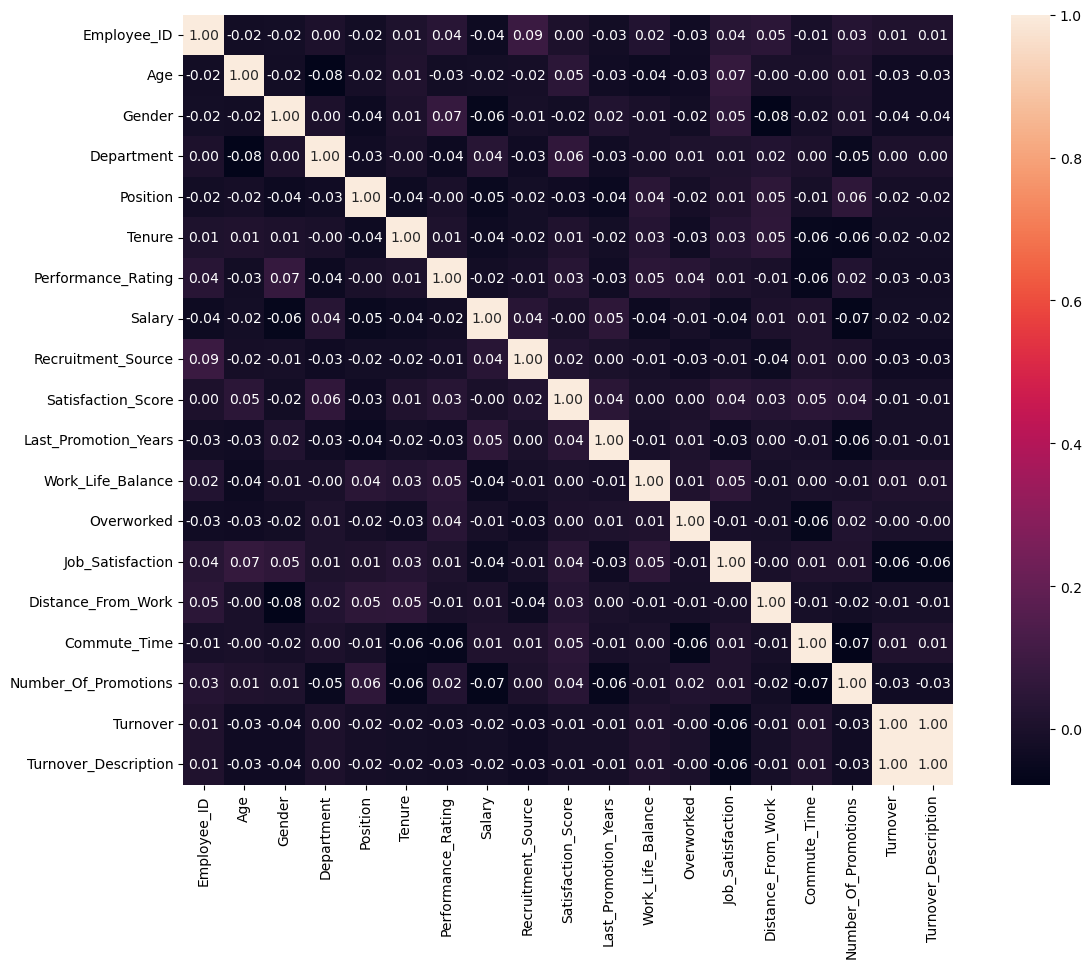

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap
plt.figure(figsize=(15, 10))
hm = sns.heatmap(numeric_df.corr(), cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()



##### This line creates the heatmap using Seaborn's heatmap() function. It calculates the correlation matrix of the numeric DataFrame numeric_df using the corr() method. The correlation matrix contains pairwise correlation coefficients between columns.

##### Parameters used:
#### cbar=True: Includes a color bar legend to indicate the scale of correlation values.
##### annot=True: Displays the correlation values in each cell of the heatmap.
##### square=True: Ensures that the heatmap cells are square-shaped.
##### fmt='.2f': Formats the correlation values to display up to two decimal places.
###### annot_kws={'size': 10}: Specifies the font size of the annotations to be 10.
  #####  This code generates a heatmap to visualize the pairwise correlation between numeric columns in the DataFrame, providing insights into the relationships between different variables.

# Feature Engineering and Data preprocessing

In [27]:
# Find maximum value Tenure
max_Tenure = df["Tenure"].max()

# Find minimum value
min_Tenure = df["Tenure"].min()

print("Maximum Tenure:", max_Tenure)
print("Minimum Tenure:", min_Tenure)


Maximum Tenure: 29
Minimum Tenure: 0


#####  This is use to know the  lenght of Tenure in the data

In [28]:
# Tenure
#df["Tenure_category"] = pd.cut(df["Tenure"], bins=[0, 10, 20, float('inf')], labels=['Earlycareer_Employees', 'Experinced_Employees', 'Longterm_Employees'])
#df["Tenure_category"].value_counts()

# Define bins and labels for Tenure category
bins = [0, 10, 20, float('inf')]
labels = ['New_Employees', 'Mid_Old_Employees', 'Old_Employees']

# Cut the "tenure" column into tenure duration categories
df["Tenure_category"] = pd.cut(df["Tenure"], bins=bins, labels=labels)

# Display the count of each tenure category
df["Tenure_category"].value_counts()

Tenure_category
Mid_Old_Employees    340
New_Employees        331
Old_Employees        299
Name: count, dtype: int64

##### After knowing the tenure rate i bin them into three

In [ ]:
df['Tenure']

In [ ]:
df.head()

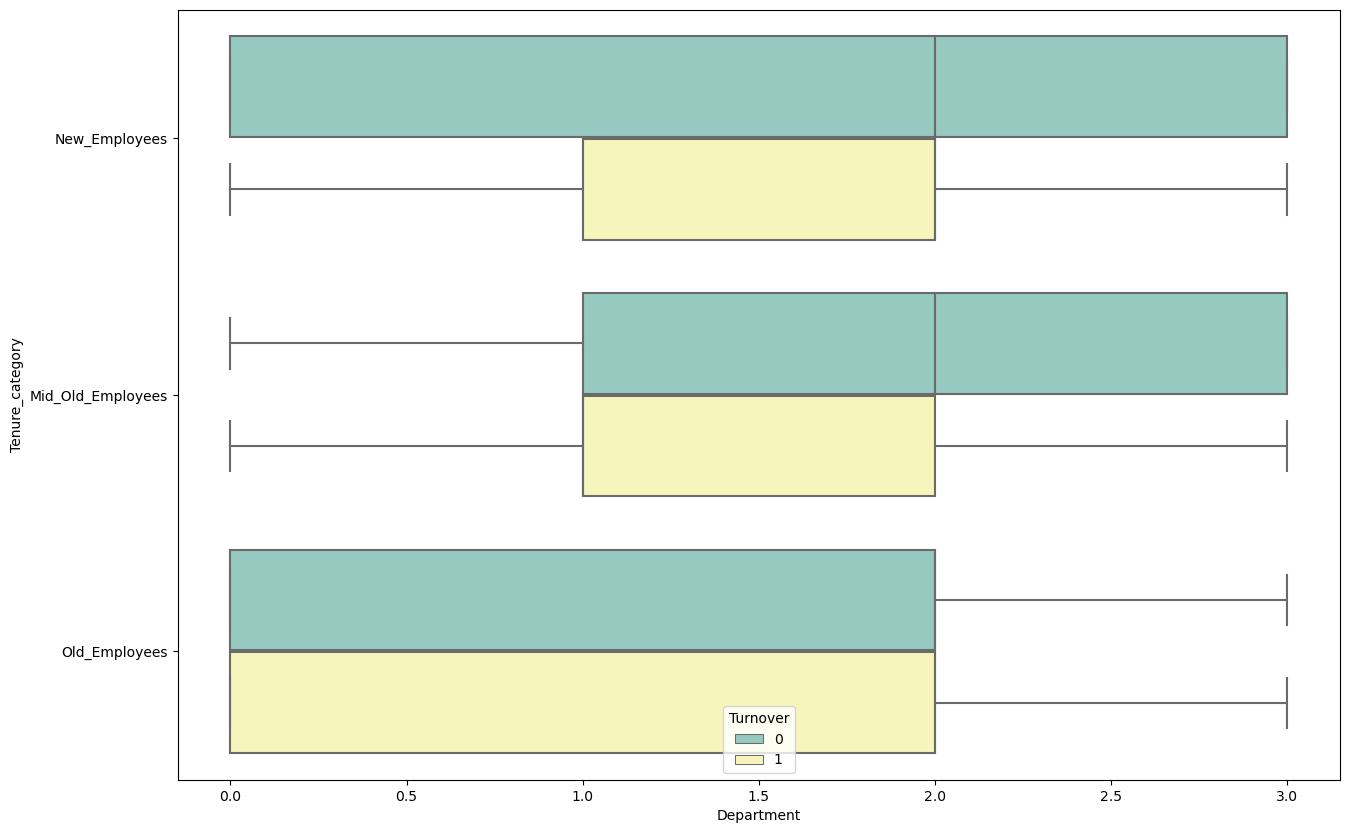

In [70]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Department', y= 'Tenure_category', hue='Turnover', data=df, palette='Set3');

### Key Observations:
##### The boxplots show the distribution of tenure categories within each department.
##### The median tenure and variability across categories can be compared between departments.
###### Turnover status is visually distinguished by the color of the boxes.
###### Differences in tenure distribution between turnover groups can be observed within departments.

### Insights:
##### Departments with wider boxplots has more variability in tenure among employees.
###### Departments with higher median tenure indicates greater employee retention.
###### Differences in tenure distribution between turnover groups helps to  suggest factors influencing turnover within specific departments.

### Recommendations:
##### We need to further investigate departments with high turnover and identify potential causes.
##### Implement retention strategies tailored to departments with lower median tenure or higher turnover rates.
######  Monitor changes in tenure distribution over time to assess the effectiveness of retention efforts.

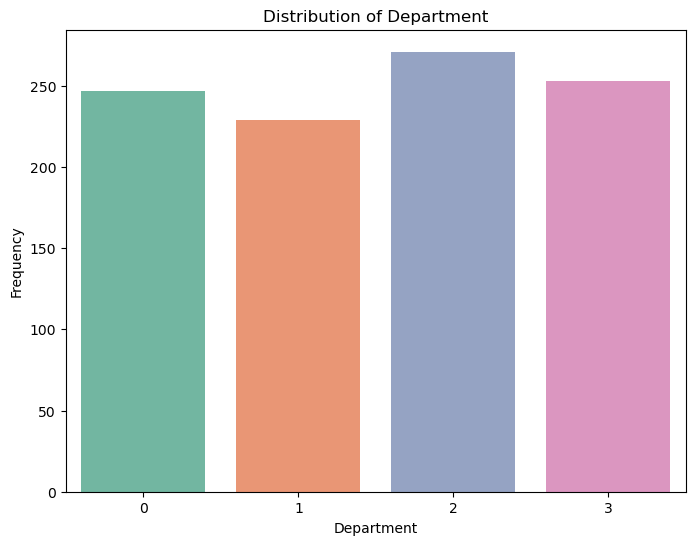

In [71]:
#Distribution of the "Department"
plt.figure(figsize = (8,6))
sns.countplot(x= "Department", data = df, palette= 'Set2')
plt.title('Distribution of Department')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()

### Purpose of code:
##### This code generates a count plot to display the distribution of employees across different departments.

### Key Observations:
##### The count plot provides a visual representation of the distribution of employees among various departments.
##### The height of each bar indicates the number of employees in each department.
##### Differences in bar heights represent disparities in employee counts across departments.

### Insights:
##### Departments with taller bars have more employees, indicating larger workforce sizes.
##### Departments with shorter bars may have fewer employees, suggesting smaller team sizes.
##### Disproportionate distributions may warrant further investigation into resource allocation and organizational structure.

### Recommendations:
##### Evaluate workload distribution and team dynamics in departments with high and low employee counts.
##### Identify opportunities for cross-department collaboration or resource reallocation based on workforce distribution.
##### Monitor changes in departmental composition over time to ensure alignment with organizational goals.


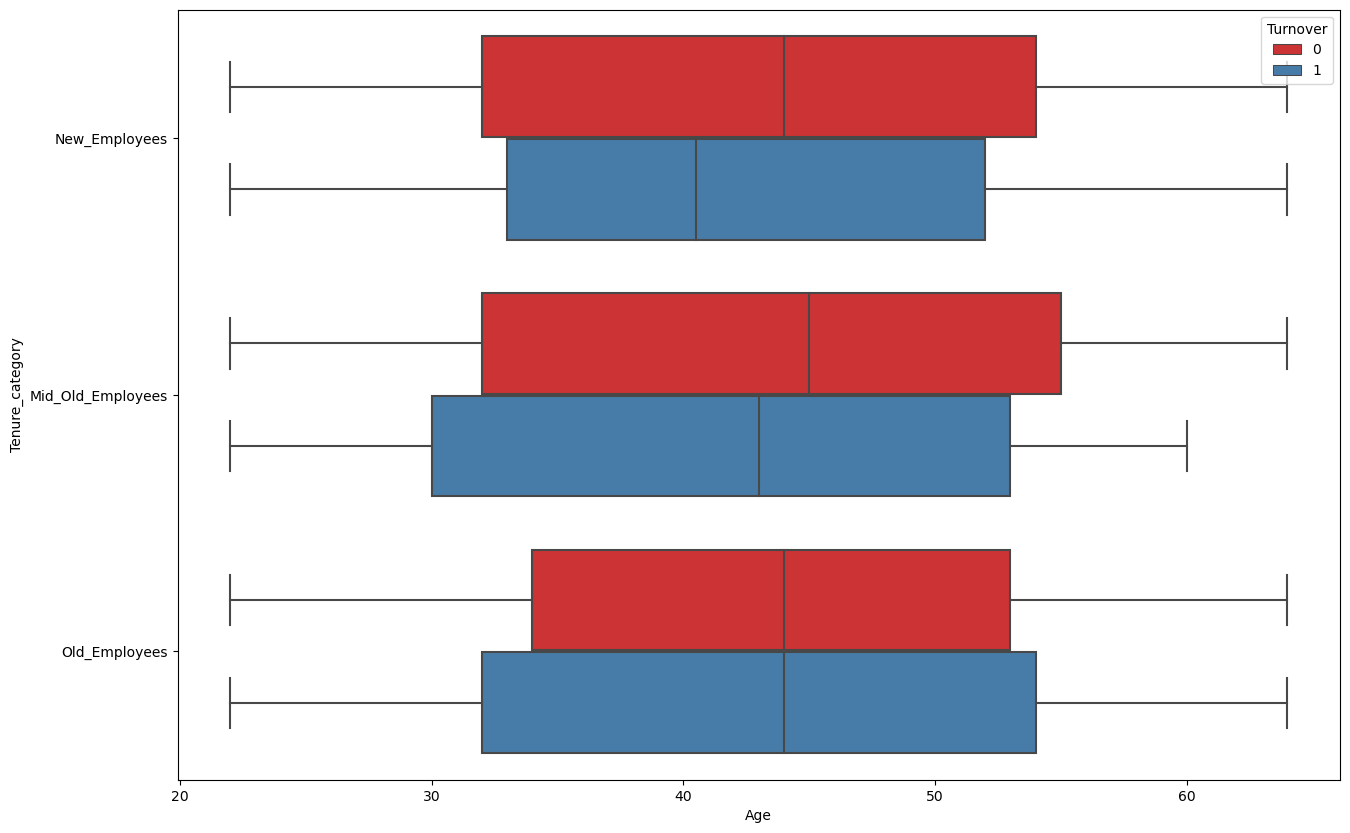

In [72]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Age', y= 'Tenure_category', hue='Turnover', data=df, palette='Set1');

###  Relationship Between Age, Tenure Category, and Turnover

### Explanation:
##### This code creates a boxplot to visualize the relationship between employee age, tenure category, and turnover.

### Key Observations:
##### The boxplots show the distribution of employee ages within each tenure category.
##### Differences in the distribution of age between tenure categories are observed.
##### Relationships between age, tenure, and turnover can be analyzed across different categories.

### Insights:
##### Younger employees exhibit different turnover patterns compared to older employees.
##### Differences in turnover rates across tenure categories varies with age.
##### Understanding age-related turnover dynamics can inform targeted retention strategies.

### Recommendations:
##### Conduct further analysis to identify age groups with higher turnover rates and factors contributing to their attrition.
##### Develop retention initiatives tailored to address age-specific challenges and preferences.
##### Implement mentorship programs or career development opportunities to enhance retention among different age cohorts.


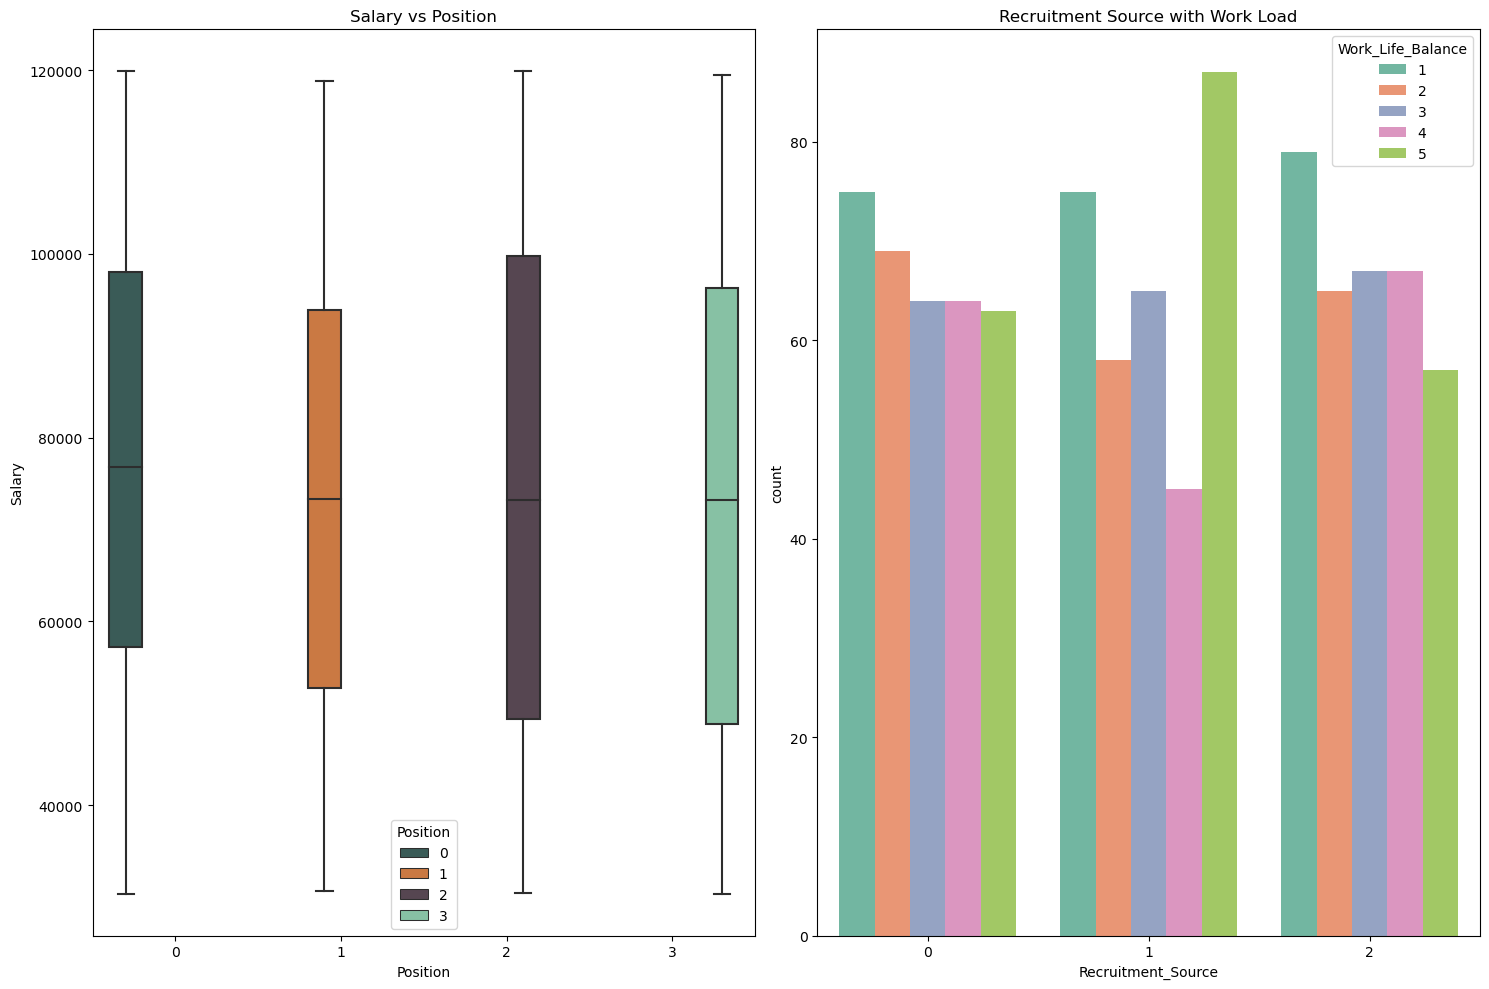

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Boxplot
sns.boxplot(x='Position', y='Salary', data=df, hue='Position', ax=ax1)
ax1.set_title('Salary vs Position')

# Countplot for Recruitment Source
sns.countplot(x='Recruitment_Source', data=df, ax=ax2, hue='Work_Life_Balance', palette='Set2')
ax2.set_title('Recruitment Source with Work Load')

# Adjust layout
plt.tight_layout()
plt.show()


### Title: Analysis of Salary, Position, Recruitment Source, and Work-Life Balance

### Objective:
##### To explore the relationship between salary and position within the organization.
##### To analyze the recruitment sources and their association with work-life balance.

### Key Observations:
##### The boxplot (left subplot) illustrates the salary distribution among various positions.
###### Differences in salary levels across different positions can be observed.
###### Outliers and salary ranges for each position are visible but there is not outliers, providing insights into compensation disparities within the organization.
##### The countplot (right subplot) presents recruitment sources categorized by work-life balance ratings.
###### It shows the distribution of candidates from different recruitment sources based on their perceived work-life balance.
##### Understanding the recruitment sources associated with better work-life balance ratings can inform HR strategies for attracting talent.

### Insights:
##### Disparities in salary across positions may influence employee satisfaction and retention.
###### Identifying recruitment sources associated with favorable work-life balance can aid in attracting candidates aligned with organizational culture.
###### Addressing discrepancies in salary and promoting work-life balance can enhance employee engagement and retention.

In [31]:
# To know the number of people that has Turnover or retain

def Turnover (Turnover_Description):
    if Turnover_Description ==1:
        return 1
    else:
        return 0
df['Turnover']= df['Turnover_Description'].apply (Turnover)
print(df['Turnover'].value_counts())

Turnover
0    807
1    193
Name: count, dtype: int64


##### The function converts the categorical turnover descriptions into binary values for analysis.
##### It creates a new column 'Turnover', where 1 represents turnover and 0 represents non-turnover.
##### The count of turnover and non-turnover instances provides insights into the turnover rate within the organization.

### Insights:
###### Understanding the distribution of turnover within the organization is crucial for identifying retention strategies.
###### High turnover rates may indicate underlying issues such as dissatisfaction, lack of career growth, or poor work environment.
###### Analyzing turnover patterns can help HR departments develop targeted interventions to improve employee retention.

### Recommendations:
###### Conduct exit interviews to gather insights from departing employees and address recurring issues.
##### Implement employee engagement programs to enhance job satisfaction and foster a positive work culture.
##### Provide professional development opportunities and career advancement paths to encourage employee loyalty.


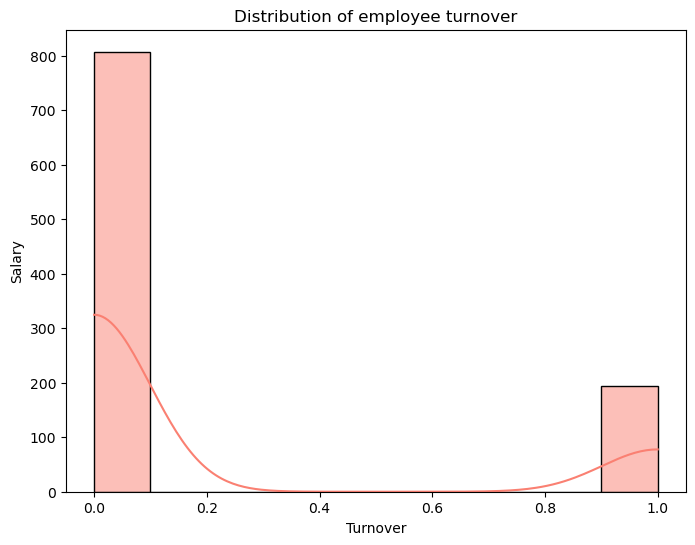

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Turnover'], bins=10, kde=True, color='salmon')
plt.title('Distribution of employee turnover')
plt.xlabel('Turnover')
plt.ylabel('Salary')
plt.show();

### Recommendations:
##### By analyzing turnover patterns, the organization can proactively address employee retention challenges and foster a stable and engaged workforce.
##### Increment in salary can reduce the trend of seasonality in turnover.

In [78]:
df1 = df[['Age','Gender','Department','Position','Tenure',
          'Performance_Rating','Salary','Recruitment_Source',
          'Job_Satisfaction','Last_Promotion_Years','Commute_Time',
          'Overworked']]
Turnover= df[['Turnover_Description']]

### Explanation:
##### This code selects specific features from the employee dataset (df) to analyze their relationship with turnover.

### Key Insights:
##### Understanding these features can aid in predicting and managing employee turnover.

### Aim:
##### Selecting relevant features and understanding their relationship with turnover is crucial for workforce management.
#####  Analysis  provide insights into factors influencing employee turnover and aid in implementing retention strategies.

In [39]:
df1.index

RangeIndex(start=0, stop=1000, step=1)

In [41]:
# dealing with Outliers - ''Age'','Turnover','Salary','Commute_Time' 

#Normalize the Data


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1['Scaled_Age'] = scaler.fit_transform(df1[['Age']].values.reshape(-1, 1))

df1['Scaled_Salary'] = scaler.fit_transform(df1[['Salary']].values.reshape(-1, 1))

df1['Scaled_Commute_Time'] = scaler.fit_transform(df1[['Commute_Time']].values.reshape(-1, 1))

df1.drop(['Commute_Time','Salary','Age'], axis=1, inplace=True)



df1.head()

,Gender,Department,Position,Tenure,Performance_Rating,Recruitment_Source,Job_Satisfaction,Last_Promotion_Years,Overworked,Scaled_Age,Scaled_Salary,Scaled_Commute_Time
0,1,2,1,24,2,0,4,7,1,0.904762,0.563509,0.851351
1,1,2,3,28,2,0,2,4,0,0.666667,0.330594,0.202703
2,0,1,0,18,4,2,5,0,0,0.333333,0.073758,0.959459
3,1,1,2,3,4,0,3,7,1,1.000000,0.092671,0.175676
4,0,2,2,22,3,0,2,8,0,0.166667,0.709497,0.405405


### Purpose:
###### MinMaxScaler is imported from scikit-learn for data normalization.
###### Features such as age, salary, and commute time are scaled using Min-Max Scaling.
###### Scaled versions of these features are created and added to the dataset.
###### Original features with outliers are dropped from the dataset.


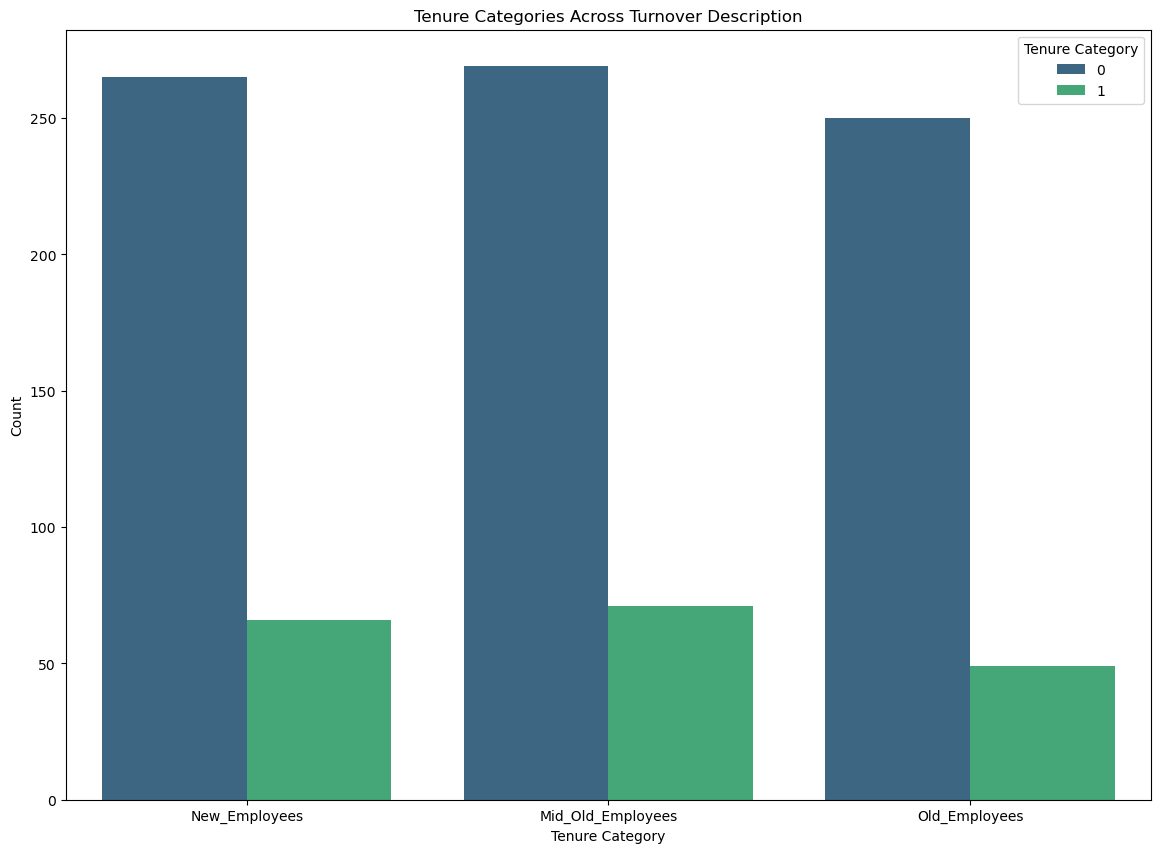

In [80]:
# Stacked Bar Chart for tenure Categories Across Loyalty
plt.figure(figsize=(14, 10))
sns.countplot(x='Tenure_category', hue='Turnover', data=df, palette='viridis')
plt.title('Tenure Categories Across Turnover Description')
plt.xlabel('Tenure Category')
plt.ylabel('Count')
plt.legend(title='Tenure Category')
plt.show()


### Analysis of Tenure Categories Across Turnover Description

### Objective:
###### To explore the distribution of tenure categories among employees with respect to their loyalty status.

### Analysis:
###### The count of employees in each tenure category is analyzed based on their loyalty status.

### Insight:
###### Analyzing tenure categories across Turnover  provide insights into employee retention and turnover patterns.

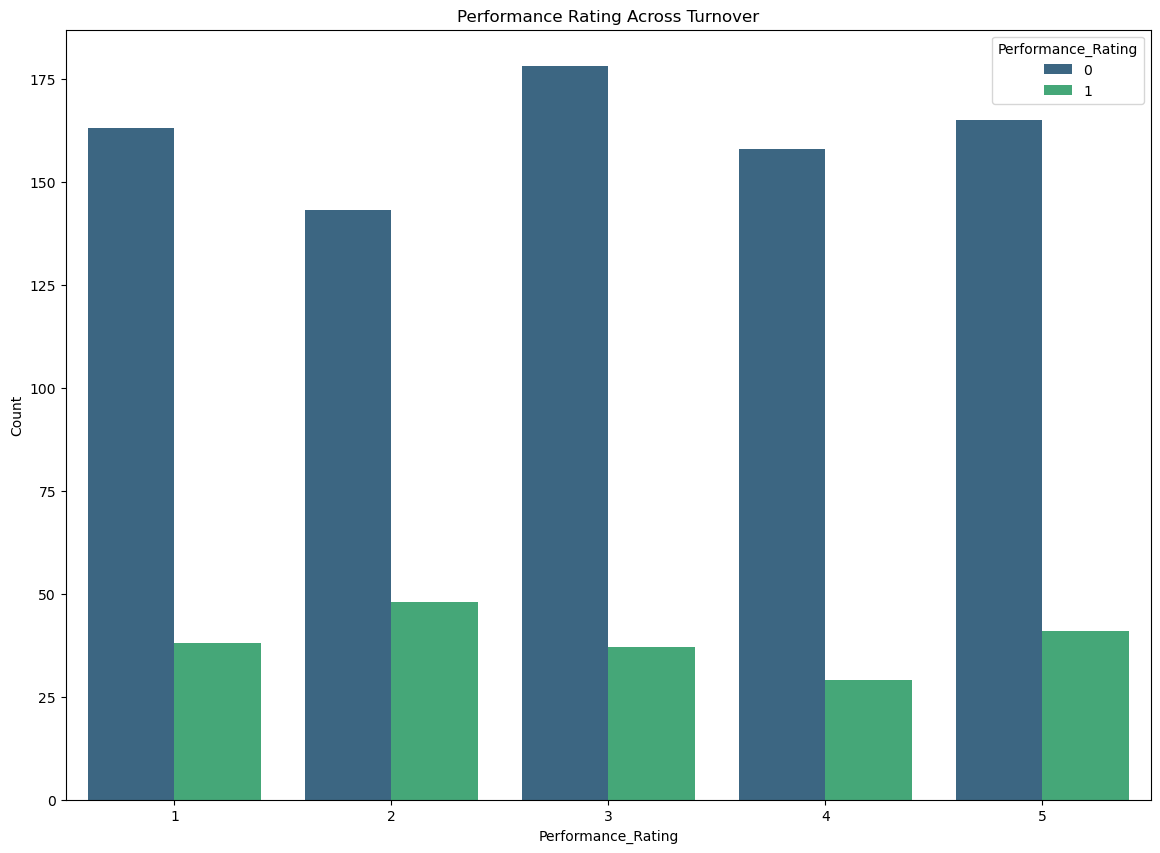

In [82]:
plt.figure(figsize=(14, 10))
sns.countplot(x='Performance_Rating', hue='Turnover', data=df, palette='viridis')
plt.title('Performance Rating Across Turnover')
plt.xlabel('Performance_Rating')
plt.ylabel('Count')
plt.legend(title='Performance_Rating')
plt.show()

### Objective:
###### To explore the distribution of performance ratings among employees with respect to their loyalty status.

### Objective:
###### To explore the distribution of performance ratings among employees with respect to their loyalty status.


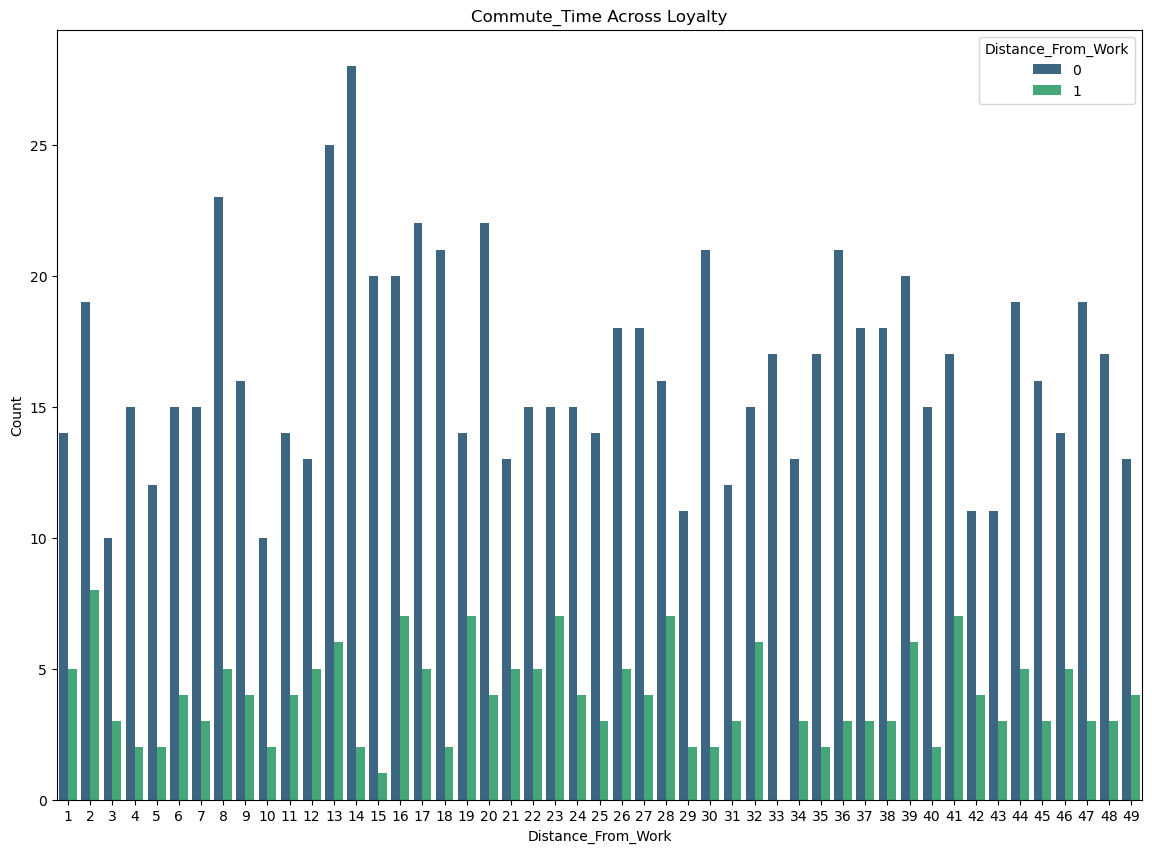

In [81]:
plt.figure(figsize=(14, 10))
sns.countplot(x='Distance_From_Work', hue='Turnover', data=df, palette='viridis')
plt.title('Commute_Time Across Loyalty')
plt.xlabel('Distance_From_Work')
plt.ylabel('Count')
plt.legend(title='Distance_From_Work')
plt.show()

### Purpose:
##### Commute time is a crucial factor affecting employee satisfaction and retention.
##### Analyzing how commute time impacts employee turnover can provide valuable insights for HR management.

### Key Insights:
##### High Commute Distances: Employees with longer commute distances may be more likely to leave due to the associated stress and time commitment.
##### Retention Strategies: Identifying employees with long commute times can help in implementing targeted retention strategies such as remote work options or transportation subsidies.

In [ ]:
df1.head()

In [44]:
df1['Last_Promotion_Years']=np.where(df1['Last_Promotion_Years']==0,df1['Last_Promotion_Years'].median(),df1['Last_Promotion_Years'])
df1.head()

,Gender,Department,Position,Tenure,Performance_Rating,Recruitment_Source,Job_Satisfaction,Last_Promotion_Years,Overworked,Scaled_Age,Scaled_Salary,Scaled_Commute_Time
0,1,2,1,24,2,0,4,7.0,1,0.904762,0.563509,0.851351
1,1,2,3,28,2,0,2,4.0,0,0.666667,0.330594,0.202703
2,0,1,0,18,4,2,5,5.0,0,0.333333,0.073758,0.959459
3,1,1,2,3,4,0,3,7.0,1,1.000000,0.092671,0.175676
4,0,2,2,22,3,0,2,8.0,0,0.166667,0.709497,0.405405


In [ ]:
df1.head()

In [45]:
from sklearn.model_selection import train_test_split

# df1 and Turnover are your feature matrix and target vector respectively

X_train, X_test, y_train, y_test = train_test_split(df1,Turnover, test_size=0.2, random_state=30)

### Introduction:

##### Before building a predictive model, it's crucial to divide the dataset into training and testing sets.
##### The purpose is to train the model on a subset of the data and evaluate its performance on unseen data.
##### It's essential to maintain a balance between the training and testing datasets to avoid overfitting or underfitting.

### Splitting the dataset into training and testing sets is a fundamental step in machine learning model development, facilitating model training, evaluation, and validation.

In [46]:
X_train.head()

,Gender,Department,Position,Tenure,Performance_Rating,Recruitment_Source,Job_Satisfaction,Last_Promotion_Years,Overworked,Scaled_Age,Scaled_Salary,Scaled_Commute_Time
795,1,2,0,2,4,0,5,2.0,0,0.595238,0.524445,0.162162
341,0,0,3,2,3,0,3,3.0,1,0.928571,0.200642,0.621622
217,0,0,0,11,4,1,2,5.0,0,0.833333,0.829958,0.824324
856,0,2,1,7,2,1,1,5.0,0,0.119048,0.233205,0.581081
604,0,2,1,17,1,1,5,6.0,0,0.357143,0.497625,0.662162


In [47]:
y_train.head()

,Turnover_Description
795,1
341,0
217,0
856,1
604,1


In [87]:
from xgboost import XGBClassifier

# Initialize XGBClassifier
xgb_clf = XGBClassifier()

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_clf.predict(X_test)

# Evaluate the model
print('XGBClassifier')
print('Accuracy:', accuracy_score(y_test, xgb_pred))
print('Precision:', precision_score(y_test, xgb_pred))
print('Recall:', recall_score(y_test, xgb_pred))
print('F1-score:', f1_score(y_test, xgb_pred))
print('AUC-ROC:', roc_auc_score(y_test, xgb_pred))


XGBClassifier
Accuracy: 0.76
Precision: 0.18181818181818182
Recall: 0.11764705882352941
F1-score: 0.14285714285714285
AUC-ROC: 0.5046066619418852


### Interpretation:

###### Accuracy alone may not provide a complete picture of model performance, especially in imbalanced datasets.
###### Precision and recall are useful for understanding the trade-off between false positives and false negatives.
###### F1-score provides a single metric that balances precision and recall.
###### AUC-ROC summarizes the model's performance across different decision thresholds.

### Evaluation metrics help assess the model's performance and guide further improvements.



In [89]:
xgb_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [90]:
y_test

,Turnover_Description
923,1
921,0
516,0
87,0
879,0
...,...
711,0
517,1
984,0
886,0


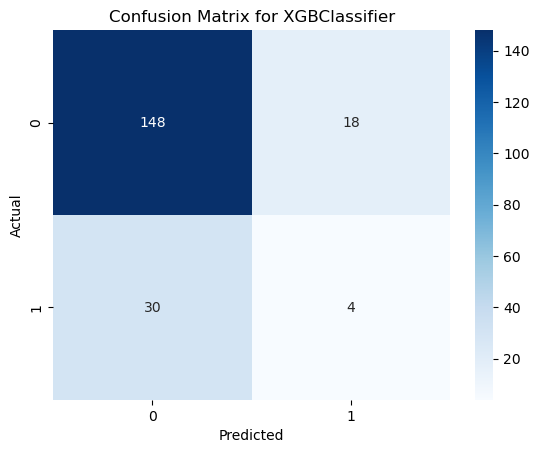

In [88]:
from sklearn.metrics import confusion_matrix

# Create a Confusion Matrix
cfm_xgb = confusion_matrix(y_test, xgb_pred)

# Visualize the confusion matrix
sns.heatmap(cfm_xgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBClassifier')
plt.show()


In [ ]:
# TP (True Positive): This is the number of instances where the model correctly predicts positive cases as positive.
# FN (False Negative): This is the number of instances where the model incorrectly predicts positive cases as negative.
# FP (False Positive): This is the number of instances where the model incorrectly predicts negative cases as positive.
# TN (True Negative): This is the number of instances where the model correctly predicts negative cases as negative.


In [51]:
# Random Forest




from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rcf_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rcf_pred))
print('Precision:', precision_score(y_test, rcf_pred))
print('Recall:', recall_score(y_test, rcf_pred))
print('F1-score:', f1_score(y_test, rcf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rcf_pred))

Random Forest Classifier
Accuracy: 0.825
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.49698795180722893


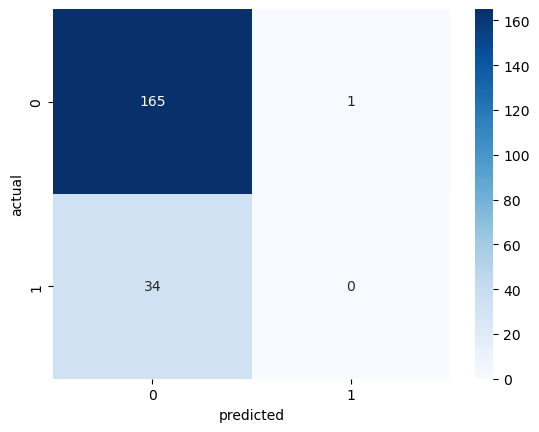

In [85]:
rfc = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(rfc,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [ ]:
TP (True Positive): This is the number of instances where the model correctly predicts positive cases as positive.
FN (False Negative): This is the number of instances where the model incorrectly predicts positive cases as negative.
FP (False Positive): This is the number of instances where the model incorrectly predicts negative cases as positive.
TN (True Negative): This is the number of instances where the model correctly predicts negative cases as negative.


In [52]:
classifiers = [[XGBClassifier(),'XGBclassifier'], 
               [RandomForestClassifier(),'Random Forest'],
               [DecisionTreeClassifier(random_state = 42),'Decision Tree'],
               [SVC(),'SVC'],
               [KNeighborsClassifier(),'K-Nearest Neighbors'],
               [SGDClassifier(),'SGD Classifier'],
               [LogisticRegression(),'Logestic Regression'],
               [GaussianNB(),'Naive Bayes']
              ]

In [53]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGBclassifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
 [SVC(), 'SVC'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD C

In [54]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier [0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [55]:
print('Accuracy Score')
S1 = pd.DataFrame (acc_list)
S1.head()

Accuracy Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,76.0%,83.0%,67.0%,83.0%,76.0%,83.0%,83.0%,83.0%


In [57]:
print('Precision Score')
S2 = pd.DataFrame (precision_list)
S2.head()

Precision Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,18.18%,0.0%,15.22%,0.0%,6.25%,0.0%,0.0%,0.0%


In [58]:
S3 = pd.DataFrame (recall_list)
S3.head()

,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,11.76%,0.0%,20.59%,0.0%,2.94%,0.0%,0.0%,0.0%


In [59]:
print('ROC Score')
S4 = pd.DataFrame (roc_list)
S4.head()

ROC Score


,XGBclassifier,Random Forest,Decision Tree,SVC,K-Nearest Neighbors,SGD Classifier,Logestic Regression,Naive Bayes
0,50.46%,50.0%,48.55%,50.0%,46.95%,50.0%,50.0%,50.0%


### Evaluation Metrics:

###### Accuracy: Measures the overall correctness of predictions.
###### Precision: Indicates the proportion of correctly predicted positive instances among all predicted positives.
###### Recall: Measures the proportion of correctly predicted positive instances among all actual positives.
###### AUC-ROC (Area Under the Receiver Operating Characteristic Curve): Quantifies the model's ability to distinguish between classes.

##### Comparing classifiers based on multiple evaluation metrics provides a comprehensive understanding of their performance.

#### Random Forest, SGD, LOgestic Regression, SVD and Naive Bayes  are the best in terms of  accuracy while XGBclassifier is the best  in terms of ROC Score, 2nd best in Recall-List, best in Precision-List.

In [60]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [61]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [62]:
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'max_depth': hp.quniform('max_depth', low=1, high=100, q=1),  # Adjust the range as needed
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.0, 0.5),
    'min_samples_split': hp.uniform('min_samples_split', 0.0, 1.0),
    'n_estimators': hp.choice('n_estimators', [100, 200, 300])
}


In [63]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x27e3d270810>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x27e3d270e10>,
 'max_features': <hyperopt.pyll.base.Apply at 0x27e3d271350>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x27e3d271790>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x27e3d271c10>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x27e3d272210>}

In [64]:

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [91]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)
best

  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]

job exception: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: Th

  0%|                                                                           | 0/30 [00:00<?, ?trial/s, best loss=?]


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 30.0 instead.
